# This examples shows how to call the A2I AI21 Labs Jurassic-2 Mid model.

https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-jurassic2.html

In [22]:
import boto3
import json

brt = boto3.Session(profile_name='sebas').client(service_name='bedrock-runtime')
prompt = "Translate to spanish: 'Amazon Bedrock is the easiest way to build and scale generative AI applications with base models (FMs)'."
prompt = "Are parameters always different when callling Amazon Bedrock models"

body = json.dumps({
    "prompt": prompt, 
    "maxTokens": 300,
    "temperature": 0.5,
    "topP": 0.5
})

modelId = 'ai21.j2-mid-v1'
accept = 'application/json'
contentType = 'application/json'

response = brt.invoke_model(
    body=body, 
    modelId=modelId, 
    accept=accept, 
    contentType=contentType
)

response_body = json.loads(response.get('body').read())

# text
print(response_body.get('completions')[0].get('data').get('text'))

[29/Feb/2024 08:32:37] INFO - Loading cached SSO token for amber-test
[29/Feb/2024 08:32:38] INFO - SSO Token refresh succeeded

When calling Amazon Bedrock models, the parameters can vary based on the specific model and use case. Some models may have fixed parameters, while others may have parameters that can be set by the user. Additionally, some models may have parameters that are learned or trained from data, and theseparameters may be different for each call.


In [20]:
import logger
import json
import boto3
from botocore.exceptions import ClientError
def invoke_stable_diffusion(prompt, seed, style_preset=None):
    """
    Invokes the Stability.ai Stable Diffusion XL model to create an image using
    the input provided in the request body.

    :param prompt: The prompt that you want Stable Diffusion  to use for image generation.       
    :param seed: Random noise seed (omit this option or use 0 for a random seed)
    :param style_preset: Pass in a style preset to guide the image model towards
                            a particular style.
    :return: Base64-encoded inference response from the model.
    """

    try:
        # The different model providers have individual request and response formats.
        # For the format, ranges, and available style_presets of Stable Diffusion models refer to:
        # https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-stability-diffusion.html

        body = {
            "text_prompts": [{"text": prompt}],
            "seed": seed,
            "cfg_scale": 10,
            "steps": 30,
        }




        if style_preset:
            body["style_preset"] = style_preset
        
        brt = boto3.Session(profile_name='sebas').client(service_name='bedrock-runtime')

        response = brt.invoke_model(
            modelId="stability.stable-diffusion-xl", body=json.dumps(body)
        )

        response_body = json.loads(response["body"].read())
        base64_image_data = response_body["artifacts"][0]["base64"]

        return base64_image_data

    except ClientError:
        logger.error("Couldn't invoke Stable Diffusion XL")
        print("XD")
        raise


base_64_img_str = invoke_stable_diffusion("Give me an image of a team working at an AI hackathon", 0)


[29/Feb/2024 06:38:33] INFO - Loading cached SSO token for amber-test


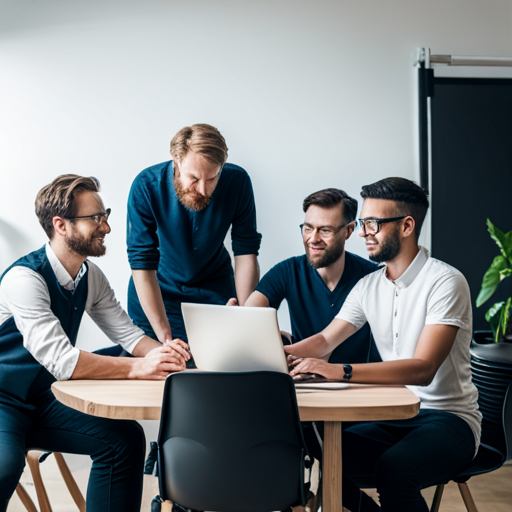

In [21]:

import base64
import io
import os
from PIL import Image

os.makedirs("data", exist_ok=True)
image_1 = Image.open(io.BytesIO(base64.decodebytes(bytes(base_64_img_str, "utf-8"))))
image_1.save("data/image_1.png")
image_1
